In [1]:
from pandas import read_csv, DataFrame
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
import numpy as np


from base.pandas_constants import AlgorithmConstants, DataFrameConstants


In [2]:
df = read_csv(AlgorithmConstants.LANDSLIDE_FINAL_DF_PATH)
df.head()

df = df[df[DataFrameConstants.DANGER_LEVEL] != 'Baixa']

In [3]:
df.describe()

,processo_numero,latitude,longitude,rain_day,rain_hour,elevation
count,1.927000e+03,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000
mean,8.049312e+09,-8.034787,-34.930820,15.314634,0.658018,47.235599
std,1.863672e+07,0.052360,0.017891,19.046952,1.286009,16.238344
min,8.000042e+09,-8.140337,-34.979501,0.000000,0.000000,7.000000
25%,8.034528e+09,-8.086452,-34.945819,3.650000,0.100000,35.000000
50%,8.053231e+09,-8.009220,-34.929010,9.600000,0.200000,47.000000
75%,8.061411e+09,-8.000093,-34.917472,19.100000,0.600000,60.000000
max,8.113660e+09,-7.961544,-34.886717,83.000000,8.300000,90.000000


In [4]:
label_encoders = {}
categorical_columns = [
    DataFrameConstants.GROUND_TYPE,
    DataFrameConstants.GROUND_AMPLITUDE,
    DataFrameConstants.SLOPE_DEGREE,
    DataFrameConstants.SLOPE_PERCENTAGE,
    DataFrameConstants.DANGER_LEVEL
]

numerical_columns = [
    DataFrameConstants.RAIN_DAY,
    DataFrameConstants.RAIN_HOUR,
    DataFrameConstants.ELEVATION,
    DataFrameConstants.LATITUDE,
    DataFrameConstants.LONGITUDE
]

df_encoded = df.copy()

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df_encoded[column] = label_encoders[column].fit_transform(df_encoded[column])

df_encoded = df_encoded[numerical_columns + categorical_columns]
df_encoded.describe()

,rain_day,rain_hour,elevation,latitude,longitude,ground_type,ground_amplitude,slope_degree,slope_percentage,danger_level
count,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000
mean,15.314634,0.658018,47.235599,-8.034787,-34.930820,2.319668,1.970420,0.981318,1.970420,0.901401
std,19.046952,1.286009,16.238344,0.052360,0.017891,1.480066,0.175489,0.195122,0.175489,0.298200
min,0.000000,0.000000,7.000000,-8.140337,-34.979501,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.650000,0.100000,35.000000,-8.086452,-34.945819,2.000000,2.000000,1.000000,2.000000,1.000000
50%,9.600000,0.200000,47.000000,-8.009220,-34.929010,3.000000,2.000000,1.000000,2.000000,1.000000
75%,19.100000,0.600000,60.000000,-8.000093,-34.917472,3.000000,2.000000,1.000000,2.000000,1.000000
max,83.000000,8.300000,90.000000,-7.961544,-34.886717,5.000000,2.000000,2.000000,2.000000,1.000000


In [5]:
best_k = 0
best_inertia = None

range_clusters = list(range(1, 30))

In [6]:
scaler = StandardScaler()


df_to_be_scaled = df_encoded
df_scaled = scaler.fit_transform(df_to_be_scaled)

DataFrame(df_scaled).describe()


,0,1,2,3,4,5,6,7,8,9
count,1.927000e+03,1.927000e+03,1.927000e+03,1.927000e+03,1.927000e+03,1.927000e+03,1.927000e+03,1.927000e+03,1.927000e+03,1.927000e+03
mean,1.474920e-17,-1.474920e-17,-1.843650e-18,-3.731548e-15,5.092014e-13,1.327428e-16,-1.253682e-16,-3.097332e-16,-1.253682e-16,5.899680e-17
std,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00
min,-8.042552e-01,-5.118072e-01,-2.478457e+00,-2.016389e+00,-2.721776e+00,-1.567680e+00,-1.123107e+01,-5.030572e+00,-1.123107e+01,-3.023591e+00
25%,-6.125737e-01,-4.340270e-01,-7.536960e-01,-9.869897e-01,-8.386258e-01,-2.160383e-01,1.685992e-01,9.576975e-02,1.685992e-01,3.307325e-01
50%,-3.001067e-01,-3.562469e-01,-1.451260e-02,4.884230e-01,1.011687e-01,4.597828e-01,1.685992e-01,9.576975e-02,1.685992e-01,3.307325e-01
75%,1.987903e-01,-4.512622e-02,7.862694e-01,6.627827e-01,7.462511e-01,4.597828e-01,1.685992e-01,9.576975e-02,1.685992e-01,3.307325e-01
max,3.554529e+00,5.943946e+00,2.634228e+00,1.399199e+00,2.465748e+00,1.811425e+00,1.685992e-01,5.222112e+00,1.685992e-01,3.307325e-01


In [7]:
SSE = []
results = []

for num_clusters in range_clusters:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
    kmeans.fit(df_scaled)
    inertia = kmeans.inertia_
    SSE.append(inertia)
    print(f'Inertia: {inertia}')
    if best_inertia is None or inertia < best_inertia:
        best_k = num_clusters
        best_inertia = kmeans.inertia_

print(f'Best K: {best_k}, Best Inertia: {best_inertia}')

C:\Users\parae\PycharmProjects\AI-for-LandSlide-prediction-\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\parae\PycharmProjects\AI-for-LandSlide-prediction-\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Inertia: 19269.999999999996
Inertia: 16446.441841111184
Inertia: 11783.53711572302
Inertia: 9889.176846455519
Inertia: 8597.508020385407
Inertia: 7790.968503450803
Inertia: 5931.456457762079
Inertia: 6544.643299476417
Inertia: 5473.353415948778
Inertia: 5230.198610269478
Inertia: 4804.127928652135
Inertia: 4436.960987395463
Inertia: 3793.5373777435043
Inertia: 3629.815874020165
Inertia: 3542.4249523764747
Inertia: 3617.3019753406334
Inertia: 3390.818117944093
Inertia: 3414.9621552214517
Inertia: 3110.2239262438634
Inertia: 3109.010284091227
Inertia: 2841.9750217649275
Inertia: 2860.5105015227596
Inertia: 2849.9911720923474
Inertia: 2626.0917441830243
Inertia: 2593.3218466944436
Inertia: 2520.032507824769
Inertia: 2471.119582105699
Inertia: 2326.5273629095022
Inertia: 2377.017919937488
Best K: 28, Best Inertia: 2326.5273629095022


Text(0, 0.5, 'Inertia')

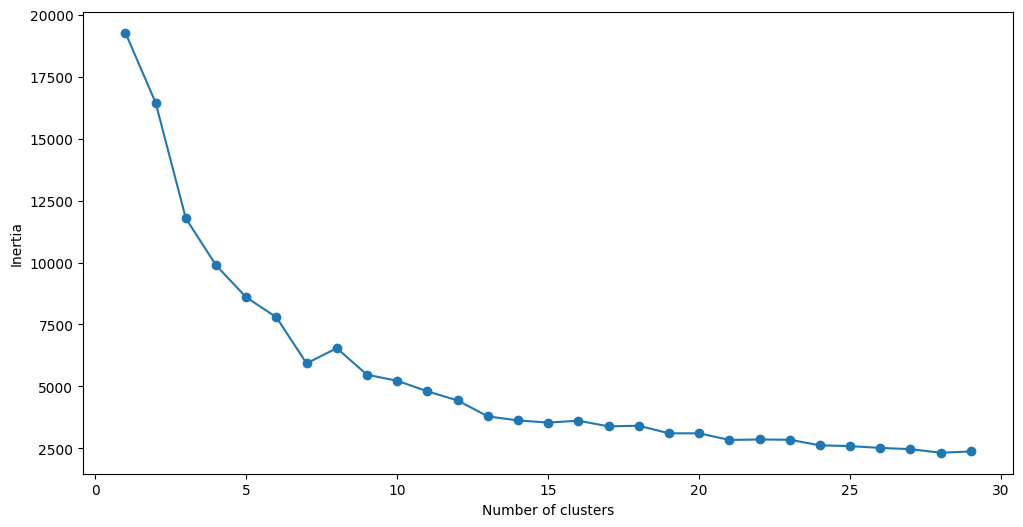

In [8]:
frame = DataFrame({'Cluster':range(1, 30), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


In [9]:
kmeans = KMeans(n_clusters=8, init='k-means++') # Using elbow curve
kmeans.fit(df_scaled)
print(f'Inertia: {kmeans.inertia_}')   
pred = kmeans.predict(df_scaled)
centroids = kmeans.cluster_centers_

Inertia: 5540.05533945466


In [10]:
df[DataFrameConstants.DISTANCE_TO_CENTROID] = np.sqrt(((df_scaled - centroids[pred]) ** 2).sum(axis=1))

df[DataFrameConstants.CLUSTER] = pred

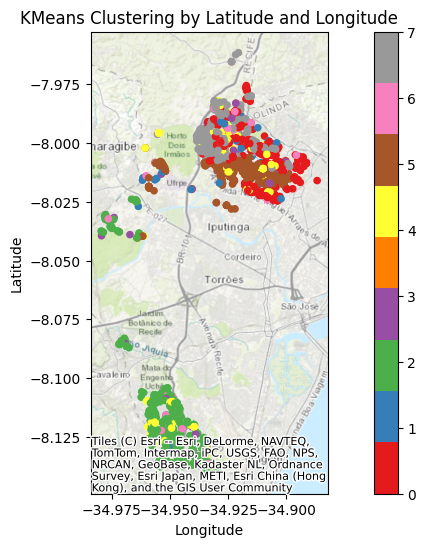

In [12]:
# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df[DataFrameConstants.LONGITUDE], df[DataFrameConstants.LATITUDE])
)

# Set a CRS (Coordinate Reference System) for the GeoDataFrame (e.g., WGS84)
gdf.set_crs(epsg=4326, inplace=True)

# Plotting with map background
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the GeoDataFrame on the ax
gdf.plot(ax=ax, column=DataFrameConstants.CLUSTER, cmap='Set1', markersize=20, legend=True)

# Add a basemap
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Esri.WorldTopoMap)

# Customize plot appearance
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('KMeans Clustering by Latitude and Longitude')

plt.show()


In [13]:
df.head()

,processo_numero,latitude,longitude,ground_type,ground_amplitude,slope_degree,slope_percentage,danger_level,rain_day,rain_hour,elevation,distance_to_centroid,cluster
1,8031386621,-7.998090,-34.921421,LVd4,20 a 100m,10 a 30º,0 a 60%,Media,3.8,1.0,23.0,1.092727,0
2,8033507521,-8.116982,-34.951488,LVd2,20 a 100m,10 a 30º,0 a 60%,Media,10.3,0.2,51.0,0.396663,2
5,8030622821,-8.004813,-34.908961,URBANO,20 a 100m,10 a 30º,0 a 60%,Media,9.2,0.4,43.0,1.110146,0
6,8030708021,-8.002648,-34.908863,LVd4,20 a 100m,10 a 30º,0 a 60%,Media,9.6,0.6,53.0,1.100500,7
7,8030626321,-8.001664,-34.903260,LVd4,20 a 100m,10 a 30º,0 a 60%,Media,9.2,0.4,25.0,1.047078,0


In [14]:
df.to_csv('kmeans.csv', index=False, header=True)

In [15]:
df.groupby(DataFrameConstants.CLUSTER)[DataFrameConstants.DISTANCE_TO_CENTROID].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,381.0,1.175449,0.430794,0.460017,0.898127,1.083756,1.332407,3.616800
1,55.0,2.559411,1.720163,0.909046,1.479327,2.301011,2.523050,8.653802
2,410.0,1.616706,1.009259,0.396663,0.975316,1.327025,2.038805,5.484298
3,60.0,2.347874,0.870909,0.779157,1.780112,2.339044,2.788925,5.798346
4,184.0,2.050049,0.530643,1.138526,1.592557,2.107725,2.370880,3.914893
5,357.0,1.372173,0.572883,0.210995,0.910482,1.345555,1.725640,3.103863
6,69.0,2.696388,0.510909,1.794313,2.305878,2.777839,3.017603,4.327017
7,411.0,0.943655,0.382721,0.290734,0.704704,0.874233,1.059733,2.631511


In [16]:
df.groupby(DataFrameConstants.CLUSTER)[DataFrameConstants.RAIN_HOUR].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,381.0,0.406824,0.599786,0.0,0.100,0.20,0.5,4.6
1,55.0,0.856364,1.889715,0.0,0.100,0.20,0.6,8.3
2,410.0,0.390000,0.521492,0.0,0.100,0.20,0.5,3.1
3,60.0,1.556667,1.299983,0.0,0.475,1.25,2.8,3.5
4,184.0,0.436413,0.695678,0.0,0.000,0.20,0.5,4.6
5,357.0,0.409524,0.532821,0.0,0.100,0.20,0.5,3.1
6,69.0,6.076812,1.420765,3.5,4.800,5.20,7.5,8.3
7,411.0,0.405839,0.564144,0.0,0.100,0.20,0.5,3.4


In [17]:
df.groupby(DataFrameConstants.CLUSTER)[DataFrameConstants.RAIN_DAY].describe()


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,381.0,10.377165,8.464926,0.0,3.60,9.4,17.8,49.1
1,55.0,23.009091,26.738011,1.0,4.35,13.4,20.8,83.0
2,410.0,11.242683,10.204935,0.0,3.30,8.0,17.8,49.1
3,60.0,80.175000,9.448534,49.1,83.00,83.0,83.0,83.0
4,184.0,11.100543,9.345374,0.0,2.90,9.6,19.0,49.1
5,357.0,10.588235,8.779197,0.0,3.30,9.2,17.8,49.1
6,69.0,66.139130,24.990705,19.1,49.10,83.0,83.0,83.0
7,411.0,10.914842,8.547212,0.0,3.65,9.4,19.0,35.6


In [18]:
df.groupby(DataFrameConstants.CLUSTER)[DataFrameConstants.ELEVATION].describe()


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,381.0,35.328084,8.978921,10.0,31.0,35.0,41.0,57.0
1,55.0,29.363636,9.661615,12.0,21.0,28.0,33.0,48.0
2,410.0,48.865854,16.671251,14.0,38.0,49.0,60.0,90.0
3,60.0,47.583333,17.146717,16.0,32.0,48.5,61.5,79.0
4,184.0,51.880435,16.620050,17.0,41.0,50.0,65.0,83.0
5,357.0,44.901961,16.180302,7.0,33.0,42.0,59.0,74.0
6,69.0,47.333333,18.134844,7.0,35.0,48.0,63.0,79.0
7,411.0,58.919708,9.918491,42.0,50.0,59.0,66.0,86.0


### Processing no landslide data to measure K Means performance

In [22]:
df_no_landslide = read_csv(AlgorithmConstants.NO_LANDSLIDE_FINAL_DF_PATH)
df_no_landslide.head()

,processo_numero,latitude,longitude,ground_type,ground_amplitude,slope_degree,slope_percentage,danger_level,rain_day,rain_hour,elevation
0,8044307221,-8.041623,-34.898067,URBANO,0 a 20m,0 a 5º,0 a 10%,Baixa,19.0,0.1,13.0
1,8043509021,-8.003224,-34.922811,LVd4,20 a 100m,10 a 30º,0 a 60%,Alta,19.0,0.7,65.0
2,8082637621,-8.018290,-34.923027,A2,20 a 100m,10 a 30º,0 a 60%,Baixa,3.8,0.2,45.0
3,8023708622,-8.010044,-34.917910,A2,20 a 100m,10 a 30º,0 a 60%,Media,0.7,0.0,41.0
4,8068433622,-8.012028,-34.917126,A2,20 a 100m,10 a 30º,0 a 60%,Media,1.2,0.2,65.0


In [23]:
df_no_landslide_encoded = df_no_landslide.copy()
for column in categorical_columns:
    df_no_landslide_encoded[column] = label_encoders[column].fit_transform(df_no_landslide_encoded[column])

df_no_landslide_encoded = df_no_landslide_encoded[numerical_columns + categorical_columns]
df_no_landslide_encoded.describe()

,rain_day,rain_hour,elevation,latitude,longitude,ground_type,ground_amplitude,slope_degree,slope_percentage,danger_level
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,12.234095,0.500000,28.360522,-8.045273,-34.929009,4.665579,1.688418,1.442088,2.151713,1.256117
std,18.242807,1.149908,21.180570,0.047511,0.022930,2.852142,1.270253,0.573366,1.743752,0.506154
min,0.000000,0.000000,1.000000,-8.146773,-34.988841,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.100000,0.000000,11.000000,-8.088152,-34.945629,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.300000,0.100000,22.000000,-8.033308,-34.928184,6.000000,1.000000,1.000000,1.000000,1.000000
75%,15.600000,0.400000,42.000000,-8.004526,-34.915067,7.000000,3.000000,2.000000,4.000000,2.000000
max,94.000000,8.000000,105.000000,-7.953198,-34.871809,8.000000,3.000000,3.000000,4.000000,2.000000


In [24]:
df_no_landslide_scaled = scaler.fit_transform(df_no_landslide_encoded)

DataFrame(df_no_landslide_scaled).describe()


,0,1,2,3,4,5,6,7,8,9
count,6.130000e+02,6.130000e+02,6.130000e+02,6.130000e+02,6.130000e+02,6.130000e+02,613.000000,6.130000e+02,6.130000e+02,6.130000e+02
mean,-1.738685e-17,-1.014233e-17,4.636494e-17,-2.376203e-14,-4.859046e-14,5.795618e-17,0.000000,-1.506861e-16,5.795618e-17,2.086422e-16
std,1.000817e+00,1.000817e+00,1.000817e+00,1.000817e+00,1.000817e+00,1.000817e+00,1.000817,1.000817e+00,1.000817e+00,1.000817e+00
min,-6.711734e-01,-4.351726e-01,-1.292830e+00,-2.138080e+00,-2.611430e+00,-1.637152e+00,-1.330284,-2.517181e+00,-1.234964e+00,-2.483716e+00
25%,-5.559655e-01,-4.351726e-01,-8.203131e-01,-9.032353e-01,-7.253806e-01,-9.353519e-01,-0.542396,-7.716696e-01,-6.610191e-01,-5.064200e-01
50%,-3.804106e-01,-3.481381e-01,-3.005451e-01,2.520330e-01,3.604433e-02,4.682484e-01,-0.542396,-7.716696e-01,-6.610191e-01,-5.064200e-01
75%,1.846566e-01,-8.703453e-02,6.444877e-01,8.583152e-01,6.085457e-01,8.191484e-01,1.033380,9.738414e-01,1.060814e+00,1.470876e+00
max,4.485751e+00,6.527589e+00,3.621341e+00,1.939530e+00,2.496607e+00,1.170048e+00,1.033380,2.719352e+00,1.060814e+00,1.470876e+00


In [29]:
no_landslide_pred = kmeans.predict(df_no_landslide_scaled)
df_no_landslide[DataFrameConstants.CLUSTER] = no_landslide_pred
df_no_landslide[DataFrameConstants.DISTANCE_TO_CENTROID] = np.sqrt(((df_no_landslide_scaled - centroids[no_landslide_pred]) ** 2).sum(axis=1))

df_no_landslide.head()

,processo_numero,latitude,longitude,ground_type,ground_amplitude,slope_degree,slope_percentage,danger_level,rain_day,rain_hour,elevation,cluster,distance_to_centroid
0,8044307221,-8.041623,-34.898067,URBANO,0 a 20m,0 a 5º,0 a 10%,Baixa,19.0,0.1,13.0,0,2.594109
1,8043509021,-8.003224,-34.922811,LVd4,20 a 100m,10 a 30º,0 a 60%,Alta,19.0,0.7,65.0,4,2.638923
2,8082637621,-8.018290,-34.923027,A2,20 a 100m,10 a 30º,0 a 60%,Baixa,3.8,0.2,45.0,5,1.995122
3,8023708622,-8.010044,-34.917910,A2,20 a 100m,10 a 30º,0 a 60%,Media,0.7,0.0,41.0,5,2.118094
4,8068433622,-8.012028,-34.917126,A2,20 a 100m,10 a 30º,0 a 60%,Media,1.2,0.2,65.0,5,2.712960


In [30]:
df_no_landslide.groupby(DataFrameConstants.CLUSTER)[DataFrameConstants.DISTANCE_TO_CENTROID].describe()


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,120.0,2.339301,0.420077,1.671898,1.944375,2.293399,2.677531,3.429132
2,139.0,2.563396,0.522939,1.785404,2.152383,2.389836,2.989826,4.177076
3,18.0,3.014067,0.448668,2.371401,2.711058,2.929801,3.258836,4.082351
4,20.0,2.606449,0.307550,2.150085,2.340101,2.679145,2.775157,3.213074
5,164.0,2.643208,0.437633,1.780072,2.370642,2.678776,2.908475,4.124837
6,20.0,3.348167,0.520918,2.532137,3.116492,3.357431,3.658124,4.316101
7,132.0,2.153613,0.363191,1.792219,1.952705,2.027544,2.235501,3.862393


In [32]:
# Compute percentage of points below each distance value for each cluster
for cluster_label in df[DataFrameConstants.CLUSTER].unique():
    cluster_distances = df[df[DataFrameConstants.CLUSTER] == cluster_label][DataFrameConstants.DISTANCE_TO_CENTROID]
    min_distance = cluster_distances.min()
    max_distance = cluster_distances.max()
    
    for distance in np.arange(min_distance, max_distance, 0.05):
        percentage_below_df = (cluster_distances < distance).mean() * 100
        percentage_below_no_landslides = (
            df_no_landslide[df_no_landslide[DataFrameConstants.CLUSTER] == cluster_label][DataFrameConstants.DISTANCE_TO_CENTROID] < distance
        ).mean() * 100
        
        print(f'Cluster {cluster_label}, Distance {distance:.2f}:')
        print(f'  Percentage below in df: {percentage_below_df:.2f}%')
        print(f'  Percentage below in df_no_landslides: {percentage_below_no_landslides:.2f}%')

Cluster 0, Distance 0.46:
  Percentage below in df: 0.00%
  Percentage below in df_no_landslides: 0.00%
Cluster 0, Distance 0.51:
  Percentage below in df: 1.31%
  Percentage below in df_no_landslides: 0.00%
Cluster 0, Distance 0.56:
  Percentage below in df: 3.41%
  Percentage below in df_no_landslides: 0.00%
Cluster 0, Distance 0.61:
  Percentage below in df: 4.72%
  Percentage below in df_no_landslides: 0.00%
Cluster 0, Distance 0.66:
  Percentage below in df: 5.77%
  Percentage below in df_no_landslides: 0.00%
Cluster 0, Distance 0.71:
  Percentage below in df: 8.40%
  Percentage below in df_no_landslides: 0.00%
Cluster 0, Distance 0.76:
  Percentage below in df: 12.60%
  Percentage below in df_no_landslides: 0.00%
Cluster 0, Distance 0.81:
  Percentage below in df: 18.37%
  Percentage below in df_no_landslides: 0.00%
Cluster 0, Distance 0.86:
  Percentage below in df: 22.05%
  Percentage below in df_no_landslides: 0.00%
Cluster 0, Distance 0.91:
  Percentage below in df: 25.20%
  

In [36]:
best_dist_for_each_cluster = {
    tuple(centroids[0]): 1.76, # 91,6 - 6,67
    tuple(centroids[1]): 2.76, # 83,64 - 0,00
    tuple(centroids[2]): 2.10, # 77,8 - 17,99
    tuple(centroids[3]): 2.63, # 71,67 - 11,11
    tuple(centroids[4]): 2.34, # 73,37 - 25,00
    tuple(centroids[5]): 2.16, # 90,20 - 17,07
    tuple(centroids[6]): 3.19, # 86,96 - 25
    tuple(centroids[7]): 1.79, # 95,38 - 0,00
}

In [37]:
# Initialize counters for accurate predictions
accurate_df_count = 0
accurate_no_landslide_count = 0

# Total number of points
total_points_df = len(df)
total_points_no_landslide = len(df_no_landslide)

# Compute accuracy for each cluster
for cluster_label in df[DataFrameConstants.CLUSTER].unique():
    # Get distances for the current cluster
    cluster_distances_df = df[df[DataFrameConstants.CLUSTER] == cluster_label][DataFrameConstants.DISTANCE_TO_CENTROID]
    cluster_distances_no_landslide = df_no_landslide[df_no_landslide[DataFrameConstants.CLUSTER] == cluster_label][DataFrameConstants.DISTANCE_TO_CENTROID]
    
    # Best distance threshold for the current cluster
    best_distance = best_dist_for_each_cluster[tuple(centroids[cluster_label])]
    
    # Calculate how many points fall below the best distance in each dataset
    accurate_df_count += (cluster_distances_df < best_distance).sum()
    accurate_no_landslide_count += (cluster_distances_no_landslide >= best_distance).sum()

# Calculate general accuracy
accuracy_df = (accurate_df_count / total_points_df) * 100
accuracy_no_landslide = (accurate_no_landslide_count / total_points_no_landslide) * 100

print(f'General accuracy for df: {accuracy_df:.2f}%')
print(f'General accuracy for df_no_landslide: {accuracy_no_landslide:.2f}%')

General accuracy for df: 86.66%
General accuracy for df_no_landslide: 88.09%
